In [2]:
#!/usr/bin/python
import os
import sys
import pickle
import random
import matplotlib
from matplotlib import pyplot
sys.path.append("../tools/")

from numpy import mean
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import tree
from sklearn.grid_search import GridSearchCV




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi'] # You will need to use more features
os.chdir("C:\\Users\\aemra\\Documents\\GitHub\\enron_mail_20110402\\final_project")
### Load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

### Task 2: Remove outliers

### EXPLORATION

num_data_points = len(data_dict)
num_data_features = len(data_dict[data_dict.keys()[0]])

num_poi = 0
for dic in data_dict.values():
	if dic['poi'] == 1: num_poi += 1

print "Data points: ", num_data_points
print "Features: ", num_data_features
print "POIs: ", num_poi



SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-75c8c54cd281>, line 20)

In [4]:

#
#
#
# are there features with many missing values? etc.
#
#
#
for dic in data_dict.values():
     matplotlib.pyplot.scatter( dic['salary'] , dic['bonus']  )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

# there is an extreme outlier

# for k, v in data_dict.items():
#     if v['salary'] != 'NaN' and v['salary'] > 10000000: print k

# turns out to be the TOTAL row from the salaries & bonuses list, let's remove it

del data_dict["TOTAL"]

### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict



NameError: name 'data_dict' is not defined

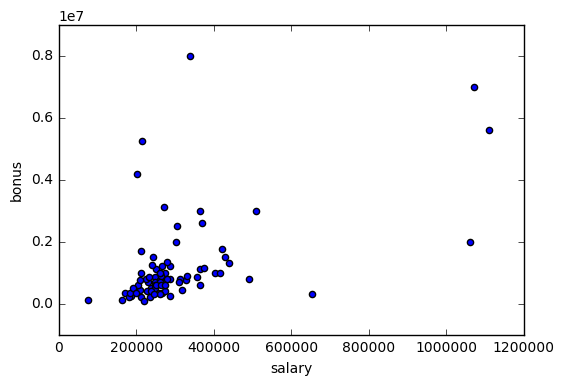

In [4]:
for dic in data_dict.values():
     matplotlib.pyplot.scatter( dic['salary'] , dic['bonus']  )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [5]:
## Custom aggregate features
## Communication:
for item in my_dataset:
    person = my_dataset[item]
    if (all([person['from_poi_to_this_person'] != 'NaN',
                person['from_this_person_to_poi'] != 'NaN',
                person['to_messages'] != 'NaN',
                person['from_messages'] != 'NaN'
            ])):
        fraction_from_poi = float(person["from_poi_to_this_person"]) / float(person["to_messages"])
        person["fraction_from_poi"] = fraction_from_poi
        fraction_to_poi = float(person["from_this_person_to_poi"]) / float(person["from_messages"])
        person["fraction_to_poi"] = fraction_to_poi
    else:
        person["fraction_from_poi"] = person["fraction_to_poi"] = 0

## Financial:
for item in my_dataset:
    person = my_dataset[item]
    if (all([person['salary'] != 'NaN',
                person['total_stock_value'] != 'NaN',
                person['exercised_stock_options'] != 'NaN',
                person['bonus'] != 'NaN'
            ])):
        person['wealth'] = sum([person[field] for field in ['salary',
                                                           'total_stock_value',
                                                              'exercised_stock_options',
                                                              'bonus']])
    else:
        person['wealth'] = 'NaN'

my_features = features_list + ['fraction_from_poi',
                               'fraction_to_poi',
                                 'shared_receipt_with_poi',
                                 'expenses',
                                 'loan_advances',
                                 'long_term_incentive',
                                 'other',
                                 'restricted_stock',
                                 'restricted_stock_deferred',
                                 'deferral_payments',
                                 'deferred_income',
                                 'salary',
                                 'total_stock_value',
                                 'exercised_stock_options',
                                 'total_payments',
                                 'bonus',
                                 'wealth']

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

print "Intuitive features:", my_features


Intuitive features: ['poi', 'fraction_from_poi', 'fraction_to_poi', 'shared_receipt_with_poi', 'expenses', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'deferral_payments', 'deferred_income', 'salary', 'total_stock_value', 'exercised_stock_options', 'total_payments', 'bonus', 'wealth']


In [6]:

# Scale features
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# K-best features
k_best = SelectKBest(k=5)
k_best.fit(features, labels)

results_list = zip(k_best.get_support(), my_features[1:], k_best.scores_)
results_list = sorted(results_list, key=lambda x: x[2], reverse=True)
print "K-best features:", results_list

## 5 best features chosen by SelectKBest
my_features = features_list + ['exercised_stock_options',
                               'total_stock_value',
                                 'bonus',
                                'salary',
                                 'fraction_to_poi']

data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)



K-best features: [(True, 'exercised_stock_options', 25.097541528735491), (True, 'total_stock_value', 24.467654047526391), (True, 'bonus', 21.060001707536578), (True, 'salary', 18.575703268041778), (True, 'fraction_to_poi', 16.641707070468989), (False, 'wealth', 15.554588511146994), (False, 'deferred_income', 11.595547659732164), (False, 'long_term_incentive', 10.072454529369448), (False, 'restricted_stock', 9.3467007910514379), (False, 'total_payments', 8.8667215371077805), (False, 'shared_receipt_with_poi', 8.7464855321290802), (False, 'loan_advances', 7.2427303965360172), (False, 'expenses', 6.234201140506757), (False, 'other', 4.2049708583014187), (False, 'fraction_from_poi', 3.2107619169667667), (False, 'deferral_payments', 0.21705893033950563), (False, 'restricted_stock_deferred', 0.064984311723709831)]


In [7]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

def test_clf(grid_search, features, labels, parameters, iterations=100):
    precision, recall = [], []
    for iteration in range(iterations):
        features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)
        grid_search.fit(features_train, labels_train)
        predictions = grid_search.predict(features_test)
        precision = precision + [precision_score(labels_test, predictions)]
        recall = recall + [recall_score(labels_test, predictions)]
        if iteration % 10 == 0:
            sys.stdout.write('.')
    print '\nPrecision:', mean(precision)
    print 'Recall:', mean(recall)
    best_params = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print '%s=%r, ' % (param_name, best_params[param_name])


In [ ]:
"""
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
parameters = {}
grid_search = GridSearchCV(clf, parameters)
print '\nGaussianNB:'
test_clf(grid_search, features, labels, parameters)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
 #param grid from http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html
parameters = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 10, 20],
               'max_depth': [None, 2, 5, 10],
               'min_samples_leaf': [1, 5, 10],
               'max_leaf_nodes': [None, 5, 10, 20]}
grid_search = GridSearchCV(clf, parameters)
print '\nDecisionTree:'
test_clf(grid_search, features, labels, parameters)

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
parameters = {'n_estimators': [10, 20, 30, 40, 50],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate': [.5,.8, 1, 1.2, 1.5]}
grid_search = GridSearchCV(clf, parameters)
print '\nAdaBoost:'
test_clf(grid_search, features, labels, parameters)

# GaussianNB:
# Precision: 0.388484126984
# Recall: 0.282984126984

# DecisionTree:
# Precision: 0.165993506494
# Recall: 0.215702380952
# criterion='entropy', 
# max_depth=None, 
# max_leaf_nodes=None, 
# min_samples_leaf=10, 
# min_samples_split=2

# AdaBoost:
# Precision: 0.414
# Recall: 0.206305555556
# algorithm='SAMME', 
# learning_rate=1.2, 
# n_estimators=10
"""

In [ ]:

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
from sklearn.ensemble import AdaBoostClassifier
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42)
clf = AdaBoostClassifier(n_estimators=10,learning_rate=0.5,algorithm='SAMME')
clf.fit(features_train,labels_train)
clf.predict(features_test)
print clf.score(features_list,labels_test)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, my_features)